In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn


import torch.optim as optim

import sys
sys.path.insert(0, '../libraries/')

import mnist_data_lib
import mnist_vae_lib
import common_utils

# Load data

In [2]:
train_set, test_set = mnist_data_lib.load_mnist_data()

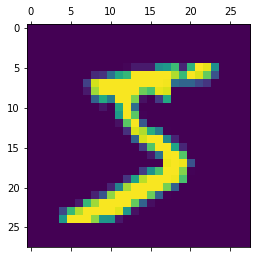

In [3]:
plt.matshow(train_set.train_data[0])

In [4]:
slen = train_set.train_data[0].shape[0]

# Get data loaders

In [5]:
batchsize = 20

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batchsize,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batchsize,
                shuffle=False)


In [6]:
for batch_idx, d in enumerate(train_loader):
    data = d
    break

# Define VAE

In [7]:
latent_dim = 5
n_classes = 10

In [8]:
vae = mnist_vae_lib.HandwritingVAE(latent_dim = latent_dim, 
                                    n_classes = n_classes)

In [18]:
# Load results

enc_file = "../mnist_vae_results_aws/mnist_vae_set_true_class_enc_epoch30"
dec_file = '../mnist_vae_results_aws/mnist_vae_set_true_class_dec_epoch30'

vae.encoder.load_state_dict(torch.load(enc_file,
                               map_location=lambda storage, loc: storage))

vae.decoder.load_state_dict(torch.load(dec_file,
                               map_location=lambda storage, loc: storage))

vae.eval()

HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=784, bias=True)
    (fc3): Linear(in_features=784, out_features=19, bias=True)
  )
  (decoder): MLPConditionalDecoder(
    (fc1): Linear(in_features=15, out_features=784, bias=True)
    (fc2): Linear(in_features=784, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=1568, bias=True)
  )
)

In [19]:
print(vae.parameters)

<bound method Module.parameters of HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=784, bias=True)
    (fc3): Linear(in_features=784, out_features=19, bias=True)
  )
  (decoder): MLPConditionalDecoder(
    (fc1): Linear(in_features=15, out_features=784, bias=True)
    (fc2): Linear(in_features=784, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=1568, bias=True)
  )
)>


In [20]:
trainloader_subs = mnist_data_lib.subsample_mnist_data(batch_size=10, 
                                                       data_set=train_set, 
                                                       propn_sample=0.001)

testloader_subs = mnist_data_lib.subsample_mnist_data(batch_size=10, 
                                                       data_set=test_set, 
                                                       propn_sample=0.001)

In [21]:
num_images = train_loader.dataset.__len__()

In [27]:
vae.eval_vae(trainloader_subs, set_true_class_label=True)

tensor(-13.2270)

In [29]:
vae.eval_vae(testloader_subs, set_true_class_label=True)

tensor(-14.4006)

In [32]:
latent_means, latent_std, latent_samples, class_weights = \
    vae.encoder_forward(data[0])

In [33]:
image_mu, image_std = vae.decoder_forward(latent_means, data[1])

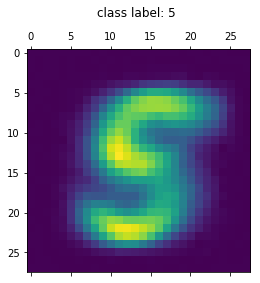

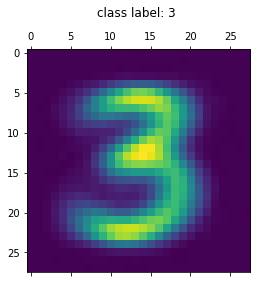

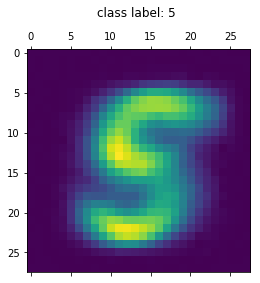

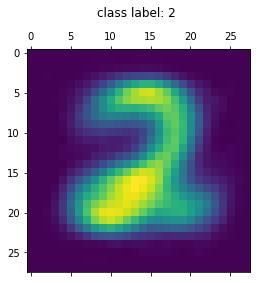

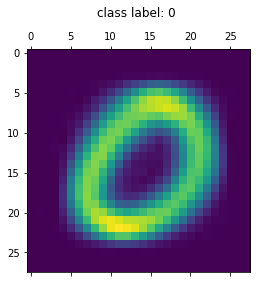

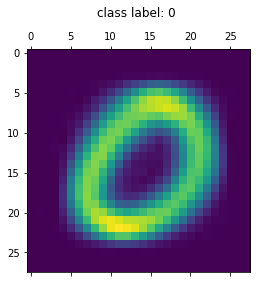

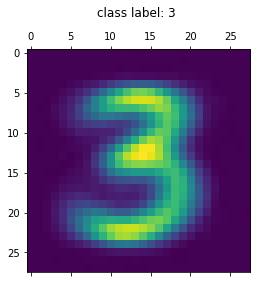

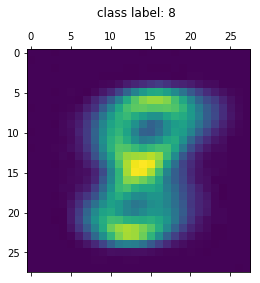

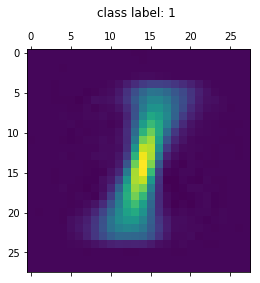

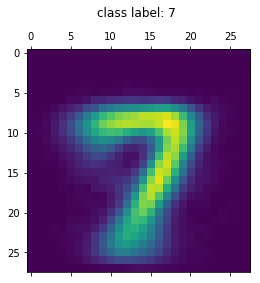

In [37]:
for i in range(10): 
    plt.matshow(image_mu[i, :, :].detach())
    plt.title('class label: {} \n'.format(data[1][i]))